data sources: https://github.com/CSSEGISandData/COVID-19_Unified-Dataset
documentation: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

# Imports

In [230]:
import datetime

In [4]:
import pandas as pd
countries_df=pd.read_csv('COVID-19_LUT.csv')
print(countries_df.shape)
countries_df.head()

(10459, 21)


,ID,Level,ISO1_3N,ISO1_3C,ISO1_2C,ISO2,ISO2_UID,FIPS,NUTS,AGS,...,ZCTA,Longitude,Latitude,Population,Admin,Admin0,Admin1,Admin2,Admin3,NameID
0,AD,Country,20,AND,AD,AD,AD,NaN,AD,NaN,...,NaN,1.52,42.51,77265.0,0,Andorra,NaN,NaN,NaN,Andorra
1,AE,Country,784,ARE,AE,AE,AE,NaN,AE,NaN,...,NaN,53.85,23.42,9890400.0,0,United Arab Emirates,NaN,NaN,NaN,United Arab Emirates
2,AF,Country,4,AFG,AF,AF,AF,NaN,AF,NaN,...,NaN,67.71,33.94,38928341.0,0,Afghanistan,NaN,NaN,NaN,Afghanistan
3,AG,Country,28,ATG,AG,AG,AG,NaN,AG,NaN,...,NaN,-61.80,17.06,97928.0,0,Antigua and Barbuda,NaN,NaN,NaN,Antigua and Barbuda
4,AL,Country,8,ALB,AL,AL,AL,NaN,AL,NaN,...,NaN,20.17,41.15,2877800.0,0,Albania,NaN,NaN,NaN,Albania


In [5]:
import pyreadr
dataR= pyreadr.read_r('COVID-19.RData')

In [6]:
cases_df = pd.DataFrame(dataR['COVID19'])

In [7]:
cases_df.head()

,ID,Date,Cases,Cases_New,Type,Age,Sex,Source
0,AD,2020-01-22,0,0,Active,Total,Total,JHU
1,AD,2020-01-22,0,0,Confirmed,Total,Total,JHU
2,AD,2020-01-22,0,0,Deaths,Total,Total,JHU
3,AD,2020-01-22,0,0,Recovered,Total,Total,JHU
4,AD,2020-01-23,0,0,Active,Total,Total,JHU


In [8]:
policies= pyreadr.read_r('Policy.RData')

In [9]:
policies_df = pd.DataFrame(policies['Policy'])
policies_df.rename(columns={"ID": "Country"}).head()

,Country,Date,PolicyType,PolicyValue,PolicyFlag,PolicyNotes,PolicySource
0,AD,2020-01-01,C1,0.0,NaN,NaN,OxCGRT
1,AD,2020-01-01,C2,0.0,NaN,NaN,OxCGRT
2,AD,2020-01-01,C3,0.0,NaN,NaN,OxCGRT
3,AD,2020-01-01,C4,0.0,NaN,NaN,OxCGRT
4,AD,2020-01-01,C5,0.0,NaN,NaN,OxCGRT


In [10]:
policies_df.head()

,ID,Date,PolicyType,PolicyValue,PolicyFlag,PolicyNotes,PolicySource
0,AD,2020-01-01,C1,0.0,NaN,NaN,OxCGRT
1,AD,2020-01-01,C2,0.0,NaN,NaN,OxCGRT
2,AD,2020-01-01,C3,0.0,NaN,NaN,OxCGRT
3,AD,2020-01-01,C4,0.0,NaN,NaN,OxCGRT
4,AD,2020-01-01,C5,0.0,NaN,NaN,OxCGRT


In [11]:
policies_df[policies_df['ID']=='FR'].head()

,ID,Date,PolicyType,PolicyValue,PolicyFlag,PolicyNotes,PolicySource
895900,FR,2020-01-01,C1,0.0,NaN,NaN,OxCGRT
895901,FR,2020-01-01,C2,0.0,NaN,NaN,OxCGRT
895902,FR,2020-01-01,C3,0.0,NaN,NaN,OxCGRT
895903,FR,2020-01-01,C4,0.0,NaN,NaN,OxCGRT
895904,FR,2020-01-01,C5,0.0,NaN,NaN,OxCGRT


# Policies: feature engineering

In [12]:
p_df=policies_df
p_df=p_df.rename(columns={"ID": "Country"})
clean_df=p_df[p_df['PolicyType']=='C1'][["Country","Date"]]
col_names=list(p_df.PolicyType.unique())

for c in col_names:
    clean_df[c]=p_df[p_df['PolicyType']==c].PolicyValue.values

In [13]:
clean_df=clean_df.drop("ID",axis=1)
clean_df=clean_df.drop("IC",axis=1)

In [14]:
clean_df.head()

,Country,Date,C1,C2,C3,C4,C5,C6,C7,C8,...,I1D,I2,I2D,I3,I3D,I4,I4D,I4L,I4LD,M1
0,AD,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31,AD,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
62,AD,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
93,AD,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
124,AD,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [15]:
#for c in col_names:
#    print(c,p_df[p_df['PolicyType']==c].PolicyValue.unique())

# Data viz (policies)

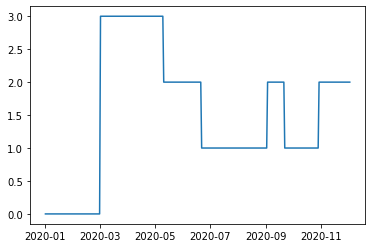

In [104]:
from matplotlib import pyplot as plt
x=clean_df[clean_df['Country']=='FR'][['C1']]
y=clean_df[clean_df['Country']=='FR'][['Date']]
plt.plot(y,x)

In [17]:
C1_agg=clean_df[["Date","C1"]].groupby('Date').mean()

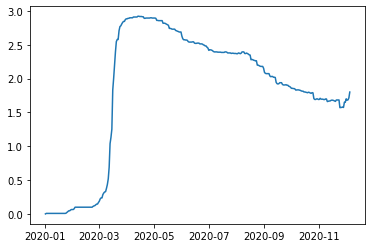

In [18]:
C1_agg.head(10)
plt.plot(C1_agg)

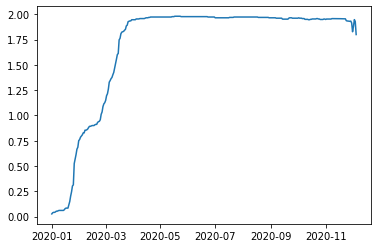

In [19]:
H1_agg=clean_df[["Date","H1"]].groupby('Date').mean()
plt.plot(H1_agg)

# Countries

In [20]:
clean_countries=countries_df[['ID','NameID','Population','Longitude','Latitude']]

In [21]:
clean_countries=clean_countries.sort_values('Population',ascending=False)

In [22]:
clean_countries.reset_index(inplace=True,drop=True)

In [23]:
clean_countries.head()

,ID,NameID,Population,Longitude,Latitude
0,CN,China,1.404676e+09,114.31,30.59
1,IN,India,1.380004e+09,78.96,20.59
2,US,United States,3.294663e+08,-100.00,40.00
3,ID,Indonesia,2.735236e+08,113.92,-0.79
4,INUP,"Uttar Pradesh, India",2.378827e+08,80.56,26.93


In [24]:
for i in range(clean_countries.shape[0]):
    if (type(clean_countries.ID.iloc[i])!=str) or (len(clean_countries.ID.iloc[i])>2):
        clean_countries.rename(index={i:'XXXXX'},inplace=True)

In [25]:
clean_countries=clean_countries.drop('XXXXX')

In [26]:
clean_countries.reset_index(inplace=True,drop=True)

In [27]:
total_population=clean_countries.Population.sum()

In [28]:
total_population

7709126175.0

In [29]:
clean_countries[:34].Population.sum()/total_population

0.8011593887292939

In [30]:
largest_countries=clean_countries[:34].ID

In [31]:
clean_countries['PopShare']=clean_countries['Population']/total_population

In [184]:
clean_countries.head(3)

,ID,NameID,Population,Longitude,Latitude,PopShare
0,CN,China,1.404676e+09,114.31,30.59,0.182210
1,IN,India,1.380004e+09,78.96,20.59,0.179009
2,US,United States,3.294663e+08,-100.00,40.00,0.042737


In [170]:
clean_countries[clean_countries['NameID']=='Sweden']

,ID,NameID,Population,Longitude,Latitude,PopShare
89,SE,Sweden,10099270.0,18.64,60.13,0.00131


# Aggregate policies by type

Policy categories: C,E,H,M: create an index for each, weighted by share of population

In [33]:
letters=['E','I','H','M']
aggregate_df=pd.DataFrame()
for L in letters:
    filter_col = [col for col in clean_df if col.startswith(L)]
    agg_temp=clean_df[filter_col]
    agg_temp=agg_temp.fillna(0)
    agg_temp[L]=agg_temp.mean(axis=1)
    aggregate_df[L]=agg_temp[L]
    
filter_col = [col for col in clean_df if col.startswith('C')]
agg_temp=clean_df[filter_col]
agg_temp=agg_temp.fillna(0)
agg_temp['C']=agg_temp.mean(axis=1)
aggregate_df['C']=agg_temp['C']

In [34]:
aggregate_df['ID']=clean_df['Country']
aggregate_df['Date']=clean_df['Date']

In [35]:
aggregate_df.set_index('Date',inplace=True)

In [36]:
aggregate_df.head()

,E,I,H,M,C,ID
Date,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,AD
2020-01-02,0.0,0.0,0.0,0.0,0.0,AD
2020-01-03,0.0,0.0,0.0,0.0,0.0,AD
2020-01-04,0.0,0.0,0.0,0.0,0.0,AD
2020-01-05,0.0,0.0,0.0,0.0,0.0,AD


In [37]:
CN_df=aggregate_df[aggregate_df['ID']=='CN']

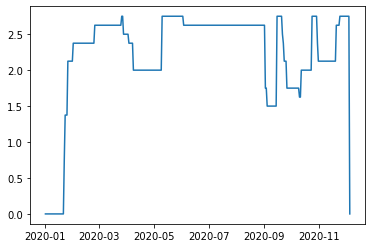

In [38]:
plt.plot(CN_df[['C']])
plt.show()

In [39]:
pop_df=clean_countries[['ID','PopShare']]
pop_df.set_index('ID',inplace=True)

In [40]:
pop_df.head()

,PopShare
ID,
CN,0.182210
IN,0.179009
US,0.042737
ID,0.035480
PK,0.028653


In [41]:
aggregate_df.head()

,E,I,H,M,C,ID
Date,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,AD
2020-01-02,0.0,0.0,0.0,0.0,0.0,AD
2020-01-03,0.0,0.0,0.0,0.0,0.0,AD
2020-01-04,0.0,0.0,0.0,0.0,0.0,AD
2020-01-05,0.0,0.0,0.0,0.0,0.0,AD


In [42]:
aggregate=aggregate_df.join(pop_df,on='ID',how='inner')

In [43]:
aggregate['E']=aggregate['E']*aggregate['PopShare']
aggregate['I']=aggregate['I']*aggregate['PopShare']
aggregate['H']=aggregate['H']*aggregate['PopShare']
aggregate['M']=aggregate['M']*aggregate['PopShare']
aggregate['C']=aggregate['C']*aggregate['PopShare']

# creation of aggregated index (weighted by country share of total population)

Closure index (schools, workplace, public events, gatherings, transports, stay at home, internal mvt, travel control)

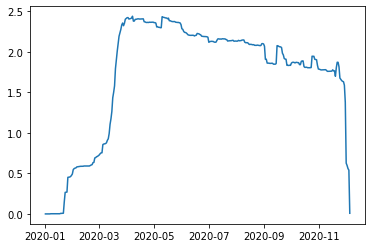

In [44]:
plt.plot((aggregate['C']).groupby('Date').sum())

Economic policies (income support, debt, fiscal measure, international support)

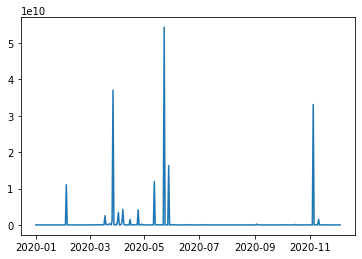

In [45]:
plt.plot((aggregate['E']).groupby('Date').sum())

Health policies (info, testing, contact tracing, investment in healthcare, invest in vaccine, vaccination policy)

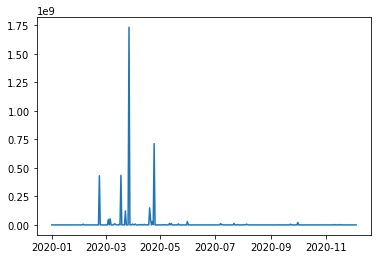

In [46]:
plt.plot(aggregate['H'].groupby('Date').sum())

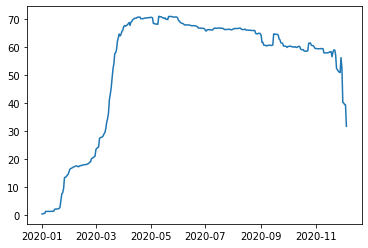

In [47]:
plt.plot(aggregate['I'].groupby('Date').sum())

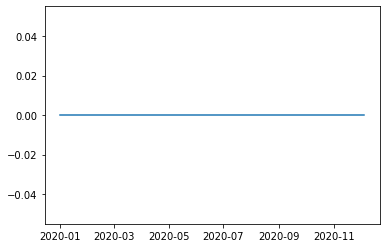

In [48]:
plt.plot(aggregate['M'].groupby('Date').sum())

# Indices: I1,2,3,4: weighted by country share of the total population

In [49]:
indices_df=clean_df[['Date','Country','I1','I2','I3','I4']]
indices_df['ID']=indices_df['Country']
indices_df=indices_df.drop(['Country'],axis=1)

/Users/paulcharpentier/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
i_df=indices_df.join(pop_df,on='ID',how='inner')

In [51]:
i_df.set_index('Date',inplace=True)

In [52]:
i_df['I1']=i_df['I1']*i_df['PopShare']
i_df['I2']=i_df['I2']*i_df['PopShare']
i_df['I3']=i_df['I3']*i_df['PopShare']
i_df['I4']=i_df['I4']*i_df['PopShare']

containment index

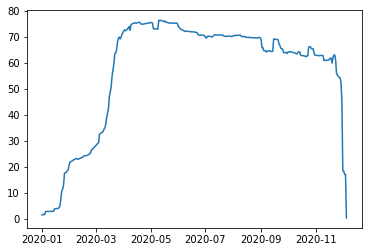

In [53]:
plt.plot((i_df['I1']).groupby('Date').sum())

Economic support index

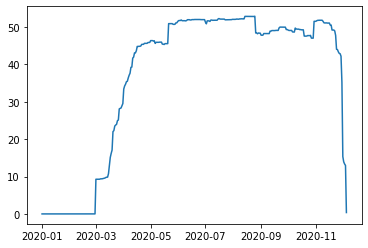

In [54]:
plt.plot((i_df['I2']).groupby('Date').sum())

Government policy index

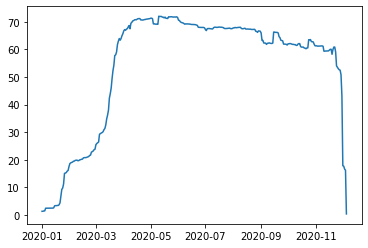

In [55]:
plt.plot((i_df['I3']).groupby('Date').sum())

Stringency index

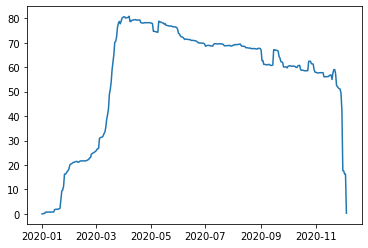

In [56]:
plt.plot((i_df['I4']).groupby('Date').sum())

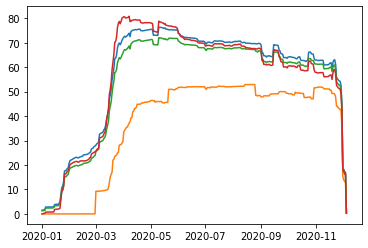

In [57]:
plt.plot((i_df['I1']).groupby('Date').sum())
plt.plot((i_df['I2']).groupby('Date').sum())
plt.plot((i_df['I3']).groupby('Date').sum())
plt.plot((i_df['I4']).groupby('Date').sum())
plt.show()

# Function Laurent t0_creation (test)

In [425]:
#from coronanet.feateng import t0_creation
#import pandas as pd
#death_df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#death_data=t0_creation(death_df)
#death_data.head()

# Who's first? : function to retreive the first date a policy was implemented

The following dunction returns the date a policy was implemented for the first time for a given country, and for a given level of policy. 
/!\ the function uses clean_df as an input

In [153]:
def policy_impl_date(df,ID,policy):#,level):
    if ID not in df['Country'].values:
        result = 'ID unknown'
    elif policy not in df.columns:
        result = 'Policy unknown'
    #elif level not in df[policy].values:
    #    result = np.nan
    #elif level not in policies_df[policies_df['PolicyType']==policy].PolicyValue.values:
    #    result = np.nan
    elif policy not in policies_df[policies_df['ID']==ID].PolicyType.values:
        result = np.nan
    else:
        try:
            df_temp=df[['Date','Country',policy]]#[df[policy]==level]
            df_t=df_temp[df_temp['Country']==ID]
            result=df_t[df_t[policy]!=0].Date.iloc[0]
        except:
            result=np.nan
    return result

In [155]:
policy_impl_date(clean_df,'CN','C3')

datetime.date(2020, 1, 22)

# Baseline model: Date, Lieu application, Type policy

In [156]:
country_ID_list=list(clean_countries.ID)
policy_ID_list=list(policies_df.PolicyType.unique())
policy_ID_list.remove('I1')
policy_ID_list.remove('I2')
policy_ID_list.remove('I3')
policy_ID_list.remove('I4')

In [157]:
print(policy_impl_date(clean_df,'FR','C3'))

2020-02-29


In [ ]:
#policy_impl_date(clean_df,country,policy,3)

In [158]:
Date=[]
Policy=[]
ID=[]
for country in country_ID_list:
    for policy in policy_ID_list:
        Policy.append(policy)
        ID.append(country)
        Date.append(policy_impl_date(clean_df,country,policy))

In [159]:
baseline_df=pd.DataFrame()
baseline_df['Date']=Date
baseline_df['ID']=ID
baseline_df['Policy']=Policy

In [183]:
#baseline_df[baseline_df.Policy=='C1']
#baseline_df[baseline_df['ID']=='AR']

Export the model to desktop

In [172]:
#baseline_df.to_csv('/Users/paulcharpentier/Desktop/Coronanet_files/baseline_df.csv')

# Count the number of policies implemented by date

In [222]:
type(baseline_df['Date'].unique()[1])

datetime.date

In [236]:
date_dict={}
dates=baseline_df['Date'].unique()
for d in dates:
    date_dict[d]=baseline_df[baseline_df['Date']==d].Date.count()

del date_dict['Policy unknown']
del date_dict['ID unknown']

In [372]:
y=list(date_dict.keys())
x=date_dict.values()
dfX=pd.DataFrame(x,y)
dfX.index=pd.to_datetime(dfX.index)
df1 = dfX.resample('W').sum()

In [450]:
cdf=cases_df[['Date','Cases_New','Type']]
c=cdf[cdf['Type']=='Deaths'].groupby('Date').sum()

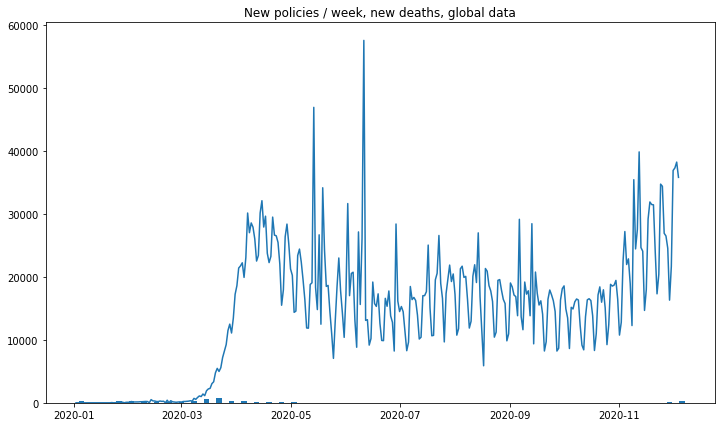

In [451]:
#plt.plot(df1.index,df1.values[:,0])
plt.figure(figsize=(12,7))
plt.title('New policies / week, new deaths, global data')
plt.bar(df1.index,df1.values[:,0],width=3)
plt.plot(c['Cases_New'])

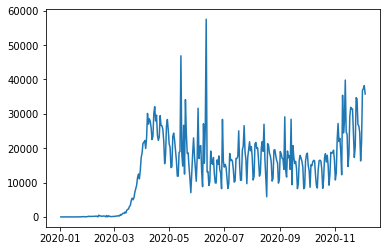

In [449]:
plt.plot(c['Cases_New'])
